## Dieses Kaptiel befasst sich mit der ersten Sichtung der Daten und initiale Erkenntnisse die man daraus ziehen kann

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
df1 = pd.read_csv("store.csv")
df2 = pd.read_csv("train.csv")

df1.head()

/tmp/ipykernel_13348/147419403.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("train.csv")


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [30]:
df2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [32]:
# Join the two dataframes using the Store column
df = pd.merge(df1, df2, on="Store")
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


<AxesSubplot: xlabel='DayOfWeek', ylabel='Sales'>

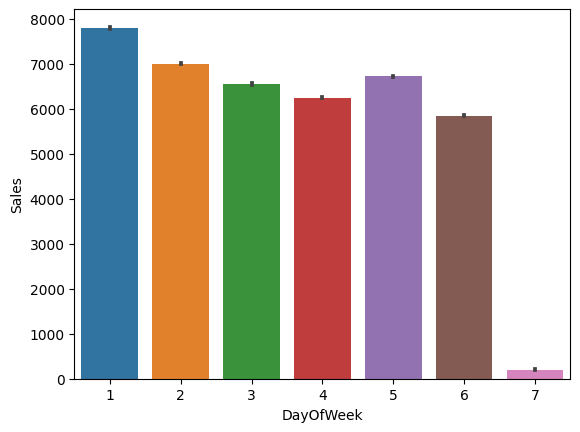

In [34]:
# between the columns day of week and sales
sns.barplot(x="DayOfWeek", y="Sales", data=df)



In [26]:
# Anhand der Heatmap kann man erkennen das eine hohe Korrelation zwischen den Spalten Promo und Sales besteht.

# show the number of missing values in each column
print(df2.isnull().sum())

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


<AxesSubplot: >

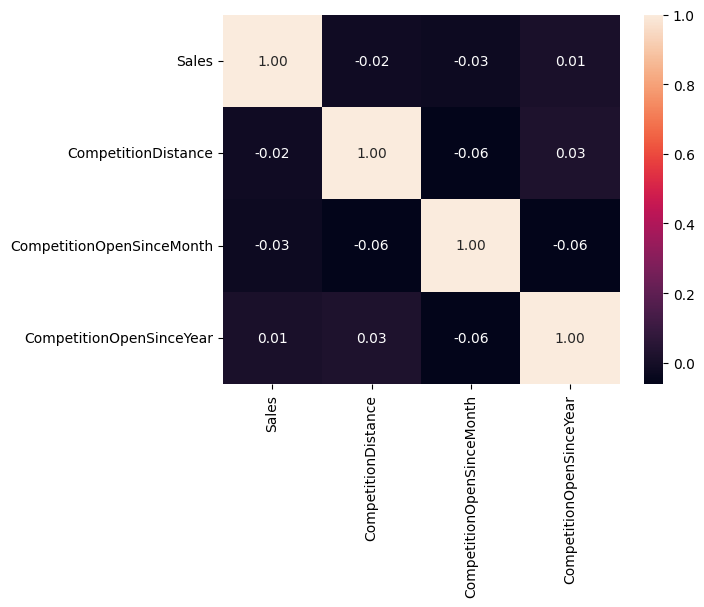

In [36]:
# plot the correltion between the columns sales and competition distance, competition open since month, competition open since year
sns.heatmap(df[["Sales", "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]].corr(), annot=True, fmt=".2f")
